In [5]:
# Import required libraries
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from IPython.display import Video, display
import time

# Import the video convolution module
from video_convolution import VideoConvolution

## 1. Configuration

Specify your input video path and output path here.

In [6]:
# ========== CONFIGURATION ==========

# Input and output paths
INPUT_VIDEO = r"C:\Users\wanglab\Desktop\mel\shortened_mel_sobel_y.mp4"  # Change this to your video path
OUTPUT_VIDEO = r"C:\Users\wanglab\Desktop\mel\shortened_mel__sobel_y_inverted.mp4"  # Change this to desired output path

# ===================================

print(f"Input video: {INPUT_VIDEO}")
print(f"Output video: {OUTPUT_VIDEO}")

Input video: C:\Users\wanglab\Desktop\mel\shortened_mel_sobel_y.mp4
Output video: C:\Users\wanglab\Desktop\mel\shortened_mel__sobel_y_inverted.mp4


## 2. Preview Single Frame

Test the inversion on a single frame before processing the entire video.

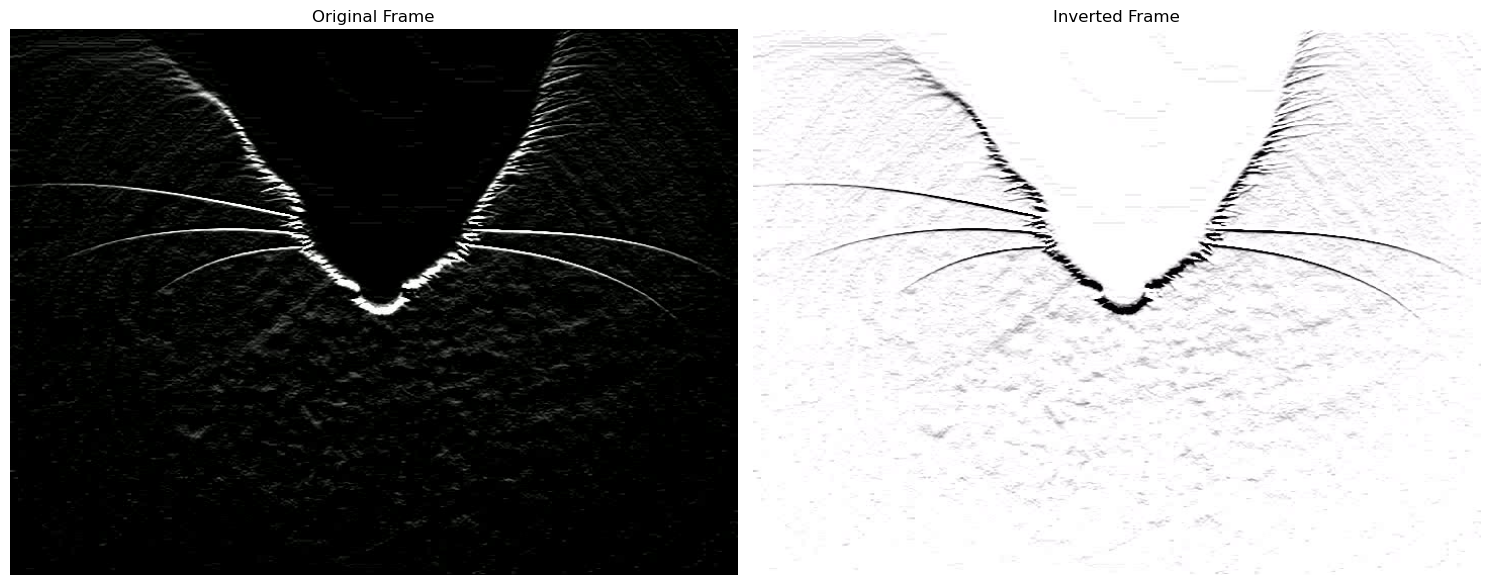


Original frame - Min: 0, Max: 255, Mean: 8.11
Inverted frame - Min: 0, Max: 255, Mean: 246.89


In [7]:
# Load a single frame for preview
cap = cv2.VideoCapture(INPUT_VIDEO)
ret, frame = cap.read()
cap.release()

if ret:
    # Invert the frame
    inverted_frame = 255 - frame
    
    # Display comparison
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))
    
    axes[0].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Frame')
    axes[0].axis('off')
    
    axes[1].imshow(cv2.cvtColor(inverted_frame, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Inverted Frame')
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Show pixel value statistics
    print(f"\nOriginal frame - Min: {frame.min()}, Max: {frame.max()}, Mean: {frame.mean():.2f}")
    print(f"Inverted frame - Min: {inverted_frame.min()}, Max: {inverted_frame.max()}, Mean: {inverted_frame.mean():.2f}")
else:
    print("Error: Could not read frame from video")

## 3. Process Entire Video

Invert all frames in the video.

In [ ]:
# Create VideoConvolution object
vc = VideoConvolution(INPUT_VIDEO, OUTPUT_VIDEO)

# Progress callback function
def progress_callback(current, total):
    percent = (current / total) * 100
    print(f"\rProgress: {current}/{total} frames ({percent:.1f}%)", end="")

# Apply inversion
print("Starting video inversion...\n")
start_time = time.time()

success = vc.invert_video(progress_callback)

elapsed_time = time.time() - start_time

if success:
    print(f"\n\n✓ Video inversion completed successfully in {elapsed_time:.2f} seconds!")
    print(f"Output saved to: {OUTPUT_VIDEO}")
else:
    print("\n\n✗ Video inversion failed!")

Starting video inversion...

Video properties: 720x540, 30 FPS, 117750 frames
Inverting video: pixel_value -> 255 - pixel_value
Progress: 2710/117750 frames (2.3%)

## 4. Display Output Video

Preview the inverted video (if the file size is reasonable).

In [ ]:
# Display the output video
if Path(OUTPUT_VIDEO).exists():
    print(f"Output video size: {Path(OUTPUT_VIDEO).stat().st_size / (1024*1024):.2f} MB")
    
    # Only display if file is less than 50MB (to avoid notebook lag)
    if Path(OUTPUT_VIDEO).stat().st_size < 50 * 1024 * 1024:
        display(Video(OUTPUT_VIDEO, width=800))
    else:
        print("Output video is too large to display in notebook. Please open it with a video player.")
else:
    print("Output video not found!")

## 5. Side-by-Side Comparison (Optional)

Display original and inverted videos side by side.

In [ ]:
from IPython.display import HTML

# Create side-by-side comparison if both files exist and are small enough
if Path(INPUT_VIDEO).exists() and Path(OUTPUT_VIDEO).exists():
    input_size = Path(INPUT_VIDEO).stat().st_size / (1024*1024)
    output_size = Path(OUTPUT_VIDEO).stat().st_size / (1024*1024)
    
    if input_size < 50 and output_size < 50:
        print("Original vs Inverted Side-by-Side:")
        display(HTML(f'''
        <div style="display: flex; justify-content: space-around;">
            <div style="text-align: center;">
                <h3>Original</h3>
                <video width="400" controls>
                    <source src="{INPUT_VIDEO}" type="video/mp4">
                </video>
            </div>
            <div style="text-align: center;">
                <h3>Inverted</h3>
                <video width="400" controls>
                    <source src="{OUTPUT_VIDEO}" type="video/mp4">
                </video>
            </div>
        </div>
        '''))
    else:
        print("Videos are too large for side-by-side display.")
else:
    print("One or both video files not found.")